# Visalization of Temperature

In [4]:
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('aggr.csv')
df['time'] = pd.to_datetime(df['time'])
colname = [f't{i}' for i in range(1, 12)]
df['max'] = df[colname].max(axis=1)
df['mean'] = df[colname].mean(axis=1)
df['min'] = df[colname].min(axis=1)
df['std'] = df[colname].std(axis=1)

In [5]:
df # value is the energy load, where the ti is the temperature observed at station 

,time,zone_id,value,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,max,mean,min,std
0,2004-01-01 00:00:00,1,16853.0,46.0,38.0,44.0,45.0,42.0,44.0,45.0,43.0,41.0,42.0,36.0,46.0,42.363636,36.0,3.074824
1,2004-01-01 01:00:00,1,16450.0,46.0,36.0,42.0,43.0,42.0,43.0,44.0,44.0,39.0,43.0,32.0,46.0,41.272727,32.0,4.076540
2,2004-01-01 02:00:00,1,16517.0,45.0,35.0,40.0,41.0,40.0,42.0,41.0,42.0,36.0,43.0,31.0,45.0,39.636364,31.0,4.056420
3,2004-01-01 03:00:00,1,16873.0,41.0,30.0,36.0,37.0,39.0,38.0,40.0,34.0,35.0,39.0,30.0,41.0,36.272727,30.0,3.744086
4,2004-01-01 04:00:00,1,17064.0,39.0,30.0,34.0,33.0,40.0,38.0,35.0,30.0,33.0,35.0,34.0,40.0,34.636364,30.0,3.294624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791995,2008-07-07 19:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791996,2008-07-07 20:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791997,2008-07-07 21:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791998,2008-07-07 22:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Temperature Raw Data

- Clear annual seasonality.
- Daily Pattern
- The difference inside zones are not significant.

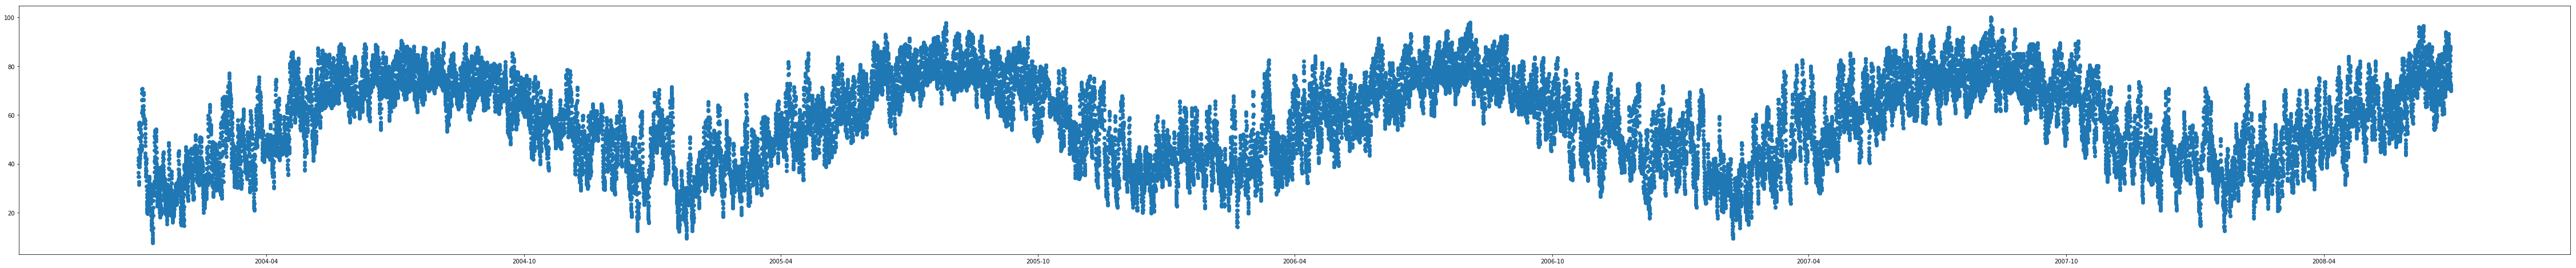

In [47]:
aggr = df[df['zone_id']==1]
fig, ax = plt.subplots(figsize=(80, 8))
plt.scatter(x=aggr['time'], y=aggr['mean'])
plt.show()

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


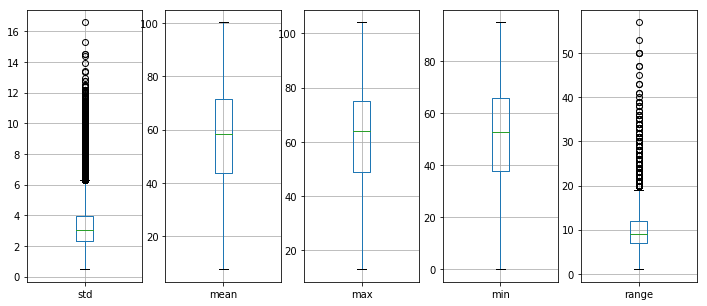

In [70]:
fig, ax = plt.subplots(1,5, figsize=(12, 5))
aggr['range'] = aggr['max'] - aggr['min']
aggr.boxplot('std', ax=ax[0])
aggr.boxplot('mean', ax=ax[1])
aggr.boxplot('max', ax=ax[2])
aggr.boxplot('min', ax=ax[3])
aggr.boxplot('range', ax=ax[4])
plt.show()

### Correlation of Different Stations

Temperatures Observed in different Stations are highly correlated, with correlations higher than 0.93.

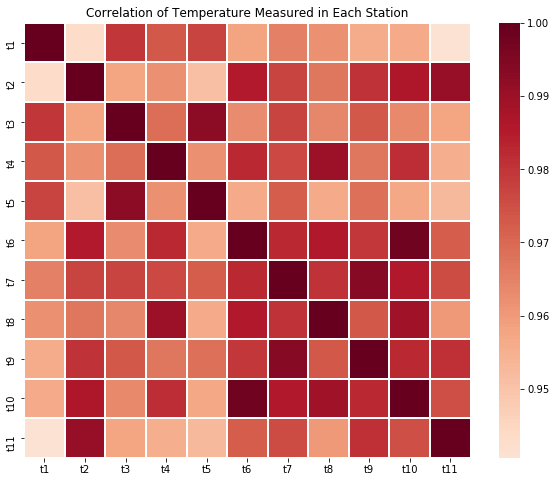

In [69]:
station = [f't{i}' for i in range(1, 12)]
fig, ax = plt.subplots(figsize=(10,8))
data = df[station]
corr = data.corr()
ax.set(title='Correlation of Temperature Measured in Each Station')
sns.heatmap(corr, xticklabels=corr.columns, ax=ax, yticklabels=corr.columns, cmap='RdBu_r', linewidths=1, center=0.93)
# plt.savefig('result/weather/correlation.png')
plt.show()

In [8]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

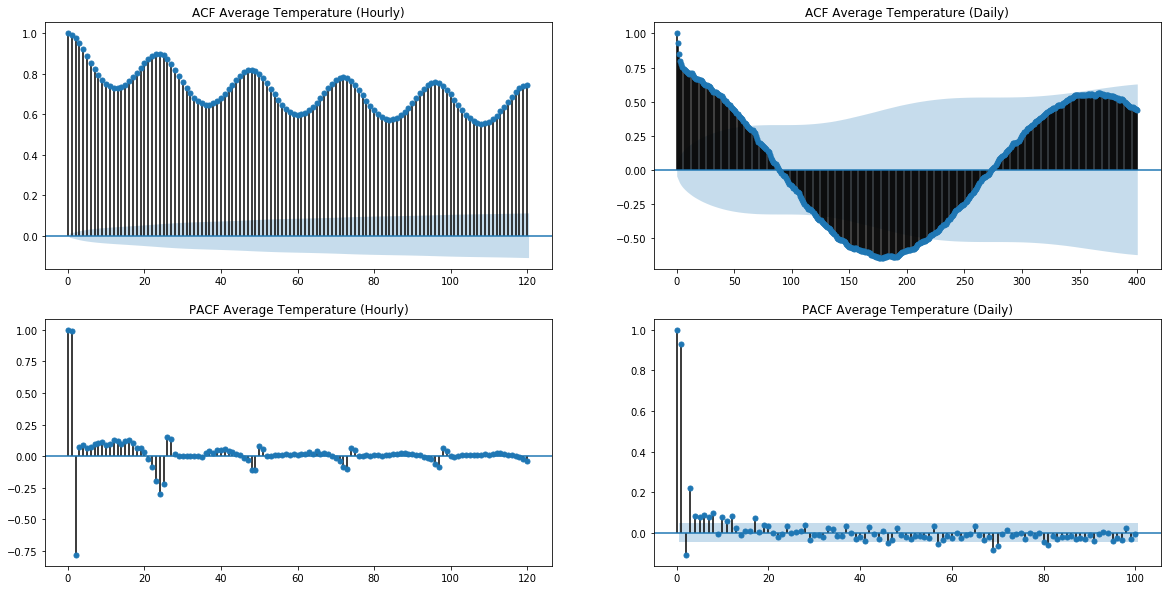

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plt.close()
fig, ax = plt.subplots(2,2,figsize=(20,10))
data = aggr.resample(on='time', rule='D').mean()
plot_acf(data[f'mean'].fillna(0), lags=400, ax=ax[0][1], title=f'ACF Average Temperature (Daily)')
# plt.savefig(f'result/weather/acf_mean_day.png')
plot_acf(aggr[f'mean'].fillna(0), lags=120, ax=ax[0][0], title=f'ACF Average Temperature (Hourly)')
# plt.savefig(f'result/weather/acf_mean.png')
plot_pacf(data[f'mean'].fillna(0), lags=100, ax=ax[1][1], title=f'PACF Average Temperature (Daily)')
# plt.savefig(f'result/weather/pacf_mean_day.png')
plot_pacf(aggr[f'mean'].fillna(0), lags=120, ax=ax[1][0], title=f'PACF Average Temperature (Hourly)')
# plt.savefig(f'result/weather/pacf_mean.png')
plt.show()

### CrossCorrelation between Energy and Temperature
- Y axis: Temperature observed in different zones
- X axis: Energy loads with different lags

Discovery: The 12 hour has the most significant correlation (negative). Zone 9 has an oppsite behavior compared with other zones.

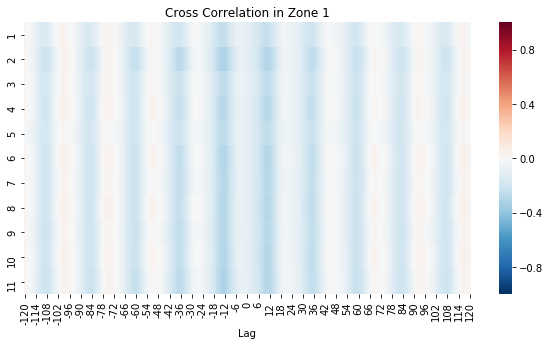

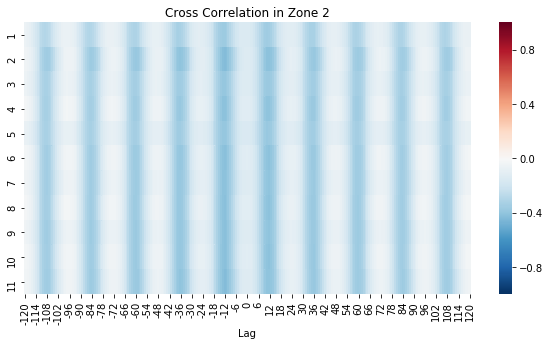

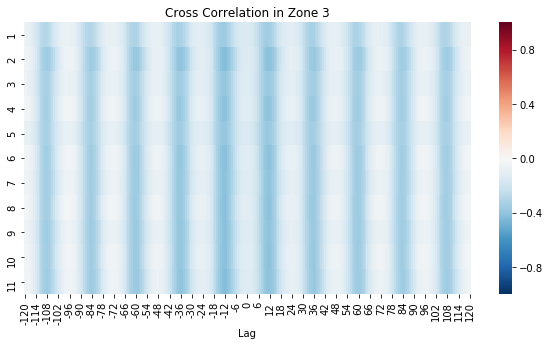

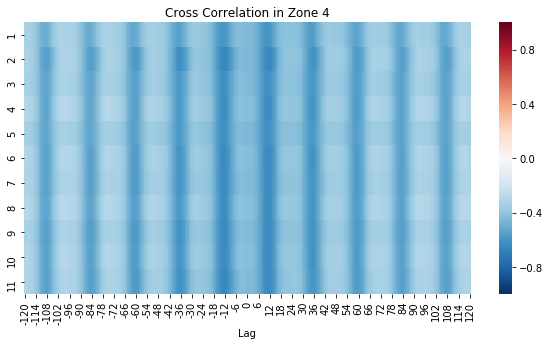

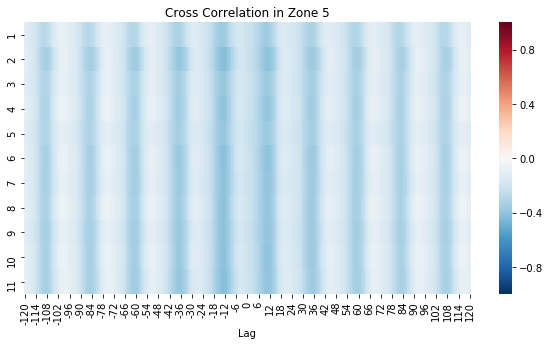

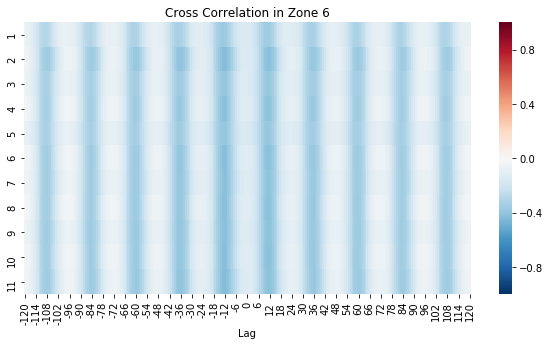

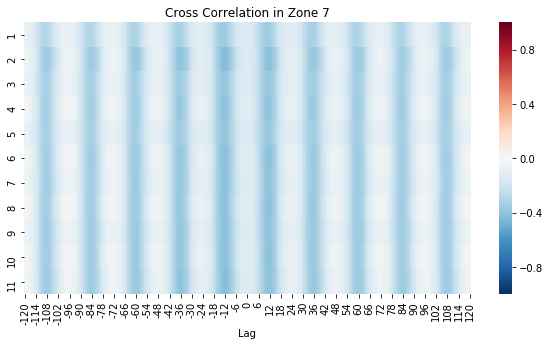

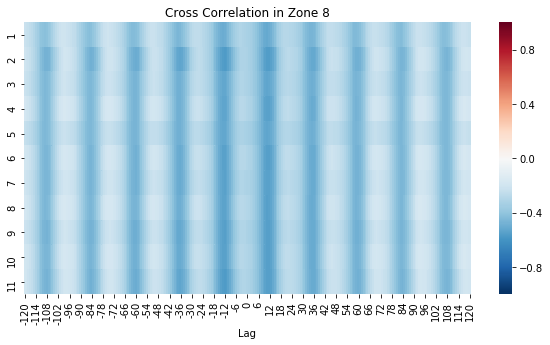

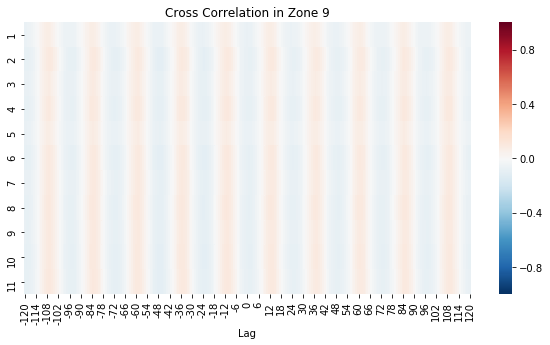

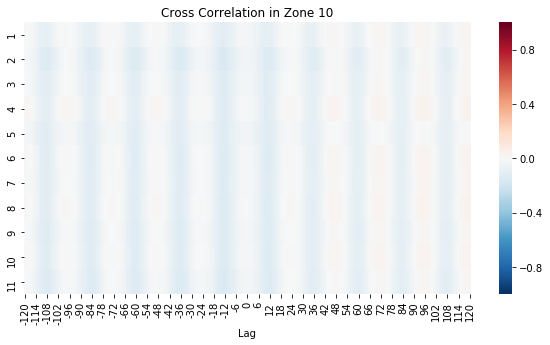

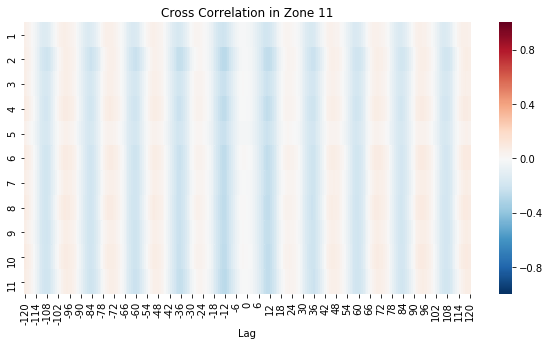

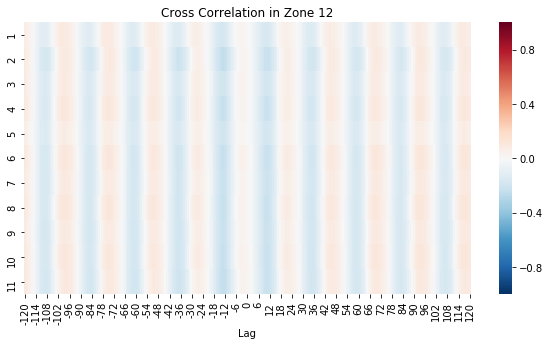

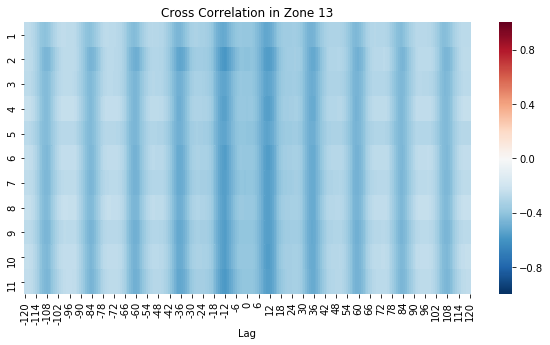

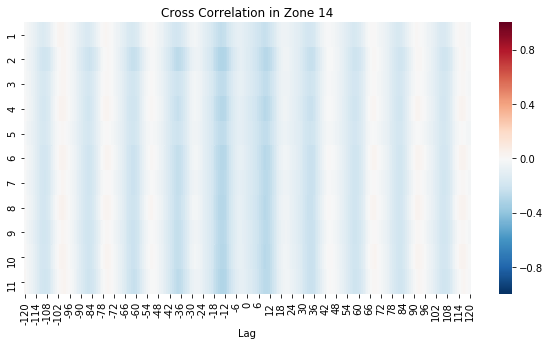

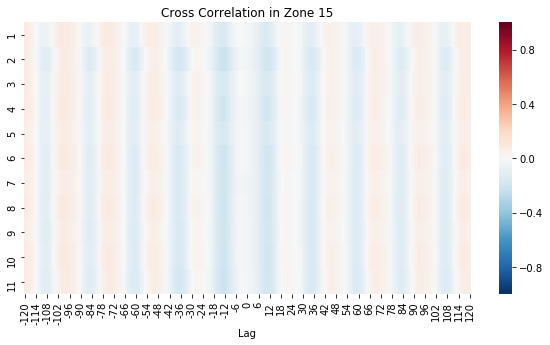

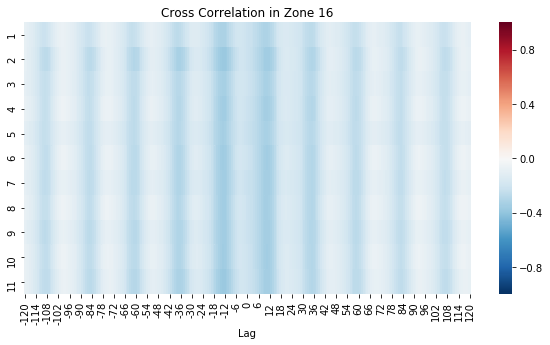

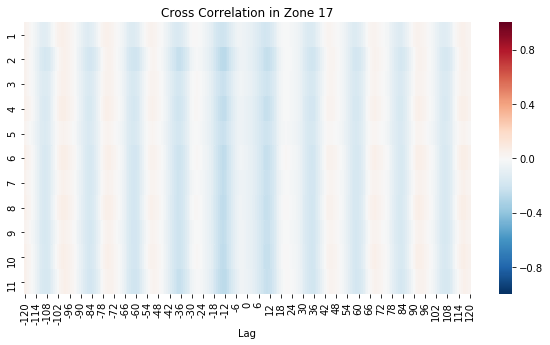

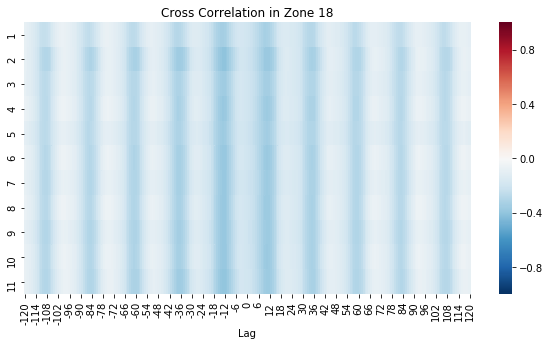

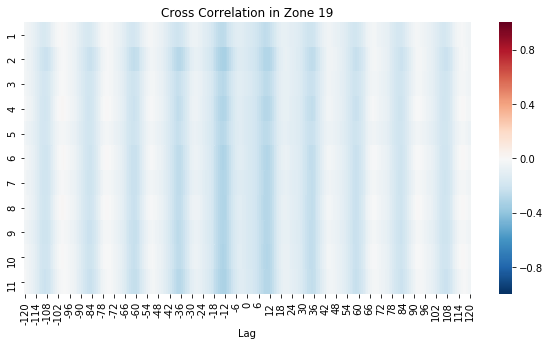

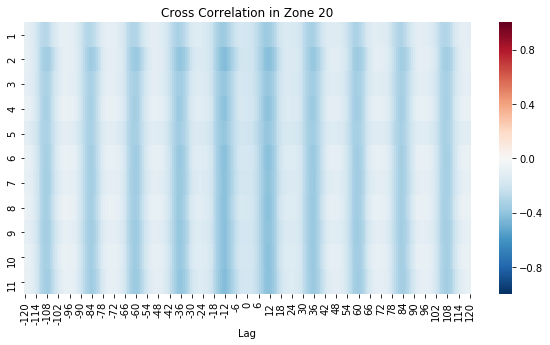

In [71]:
def CrossCorrelation(data, title='Correlation', idx=0):
    data.sort_values('time')
    rss = []
    for i in range(1, 12):
        rs = [crosscorr(data[f't{i}'], data['value'], lag) for lag in range(-120, 121)]
        rss.append(rs)
    rss = pd.DataFrame(rss)
    f,ax = plt.subplots(figsize=(10,5))
    sns.heatmap(rss,cmap='RdBu_r',ax=ax, center=0, vmin=-1, vmax=1)
    ax.set(title=title, xlabel='Lag',ylabel='')
    ax.set_yticklabels([f'{int(item)+1}' for item in ax.get_yticks()])
    ax.set_xticklabels([f'{int(item)-120}' for item in ax.get_xticks()])
    plt.savefig(f'result/correlation/cross-zone-{idx}.png')
    plt.show()
    
for zid in range(1, 21):
    CrossCorrelation(df[df['zone_id']==zid], f'Cross Correlation in Zone {zid}', zid)

### Zone 21
Cross Correlation with weather

In [59]:
total = df.groupby(['time','t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'max', 'mean', 'min', 'std']).sum().reset_index()

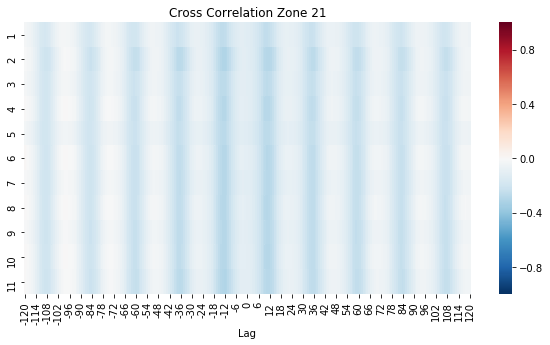

In [65]:
data = total
data.sort_values('time')
rss = []
for i in range(1, 12):
    rs = [crosscorr(data[f't{i}'], data['value'], lag) for lag in range(-120, 121)]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax, center=0, vmin=-1, vmax=1)
ax.set(title='Cross Correlation Zone 21', xlabel='Lag',ylabel='')
ax.set_yticklabels([f'{int(item)+1}' for item in ax.get_yticks()])
ax.set_xticklabels([f'{int(item)-120}' for item in ax.get_xticks()])
plt.savefig(f'result/correlation/cross-zone-{21}.png')
plt.show()

### Autocorrelation of the Energy Loads
- granularity: hour, 180 hours in total

Discovery: Daily seasonality. Abnormal zones: 4, 9, 10. 

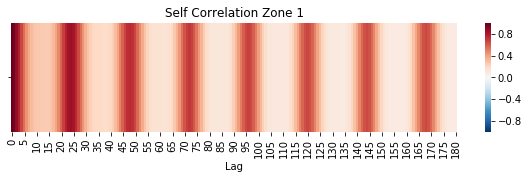

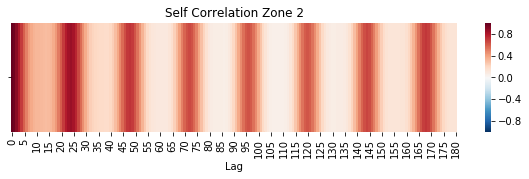

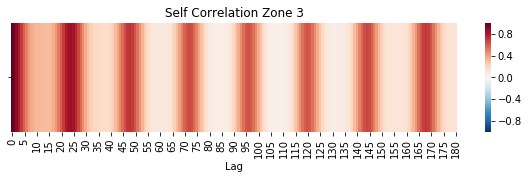

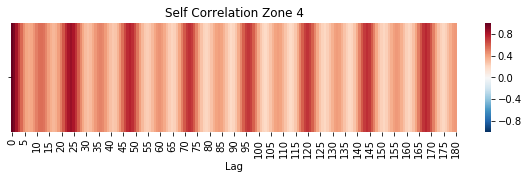

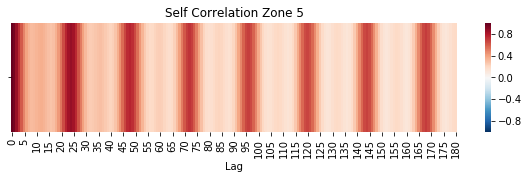

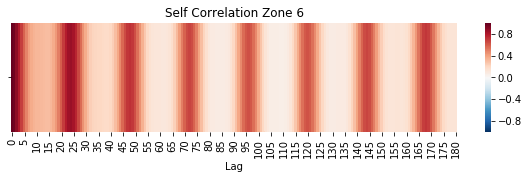

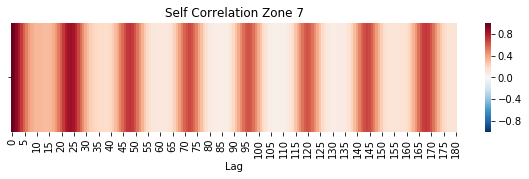

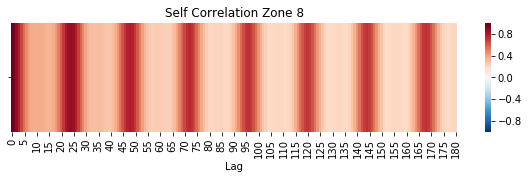

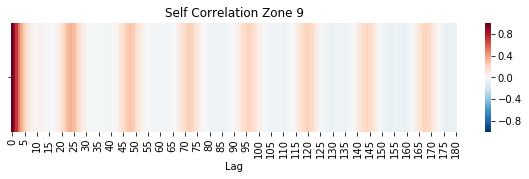

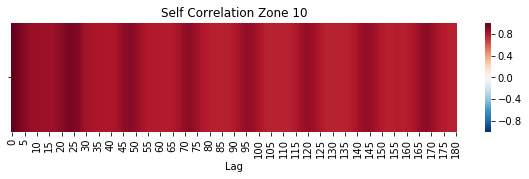

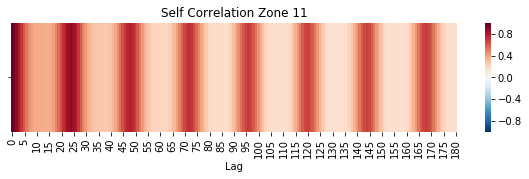

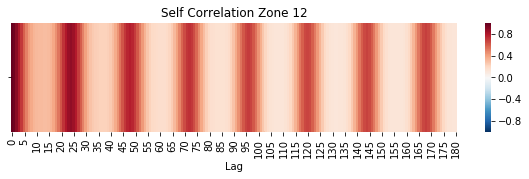

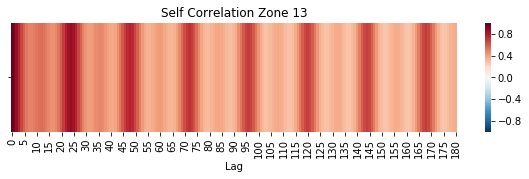

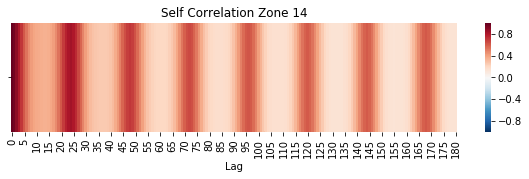

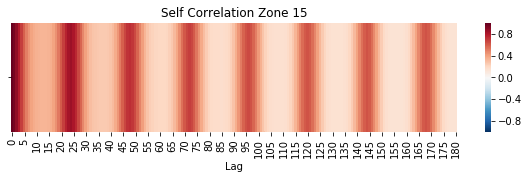

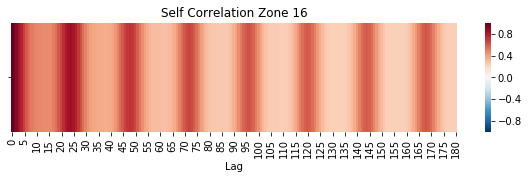

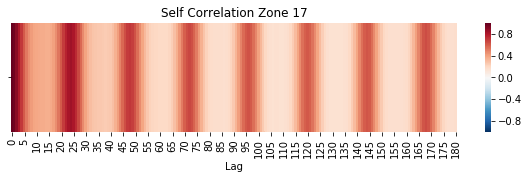

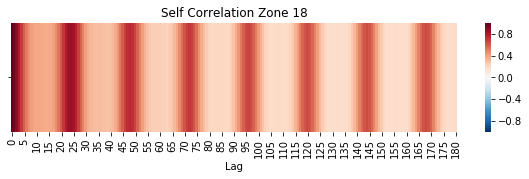

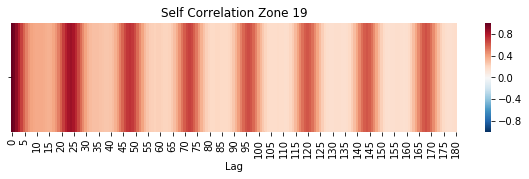

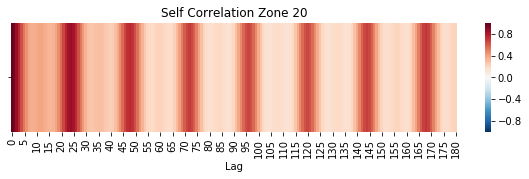

In [18]:
def AutoCorrelation(data, title='Correlation', idx=0):
    data.sort_values('time')
    rss = []
    rs = [crosscorr(data['value'], data['value'], lag) for lag in range(0, 181)]
    rss.append(rs)
    rss = pd.DataFrame(rss)
    f,ax = plt.subplots(figsize=(10,2))
    sns.heatmap(rss,cmap='RdBu_r',ax=ax, center=0, vmin=-1, vmax=1)
    ax.set(title=title, xlabel='Lag',ylabel='')
    ax.set_yticklabels([f'' for item in ax.get_yticks()])
    ax.set_xticklabels([f'{int(item)}' for item in ax.get_xticks()])
    # plt.savefig(f'result/correlation/zone-{idx}.png')
    plt.show()
for i in range(1, 21):
    data = df[df['zone_id']==i]
    AutoCorrelation(data, f'Self Correlation Zone {i}', i)